In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
tsla = yf.Ticker("TSLA")

In [3]:
tesla_data = tsla.history(period = "max")

In [16]:
tesla_data.reset_index(inplace=True)
tesla_data.head

<bound method NDFrame.head of       index                      Date        Open        High         Low  \
0         0 2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1         1 2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2         2 2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3         3 2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4         4 2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...     ...                       ...         ...         ...         ...   
3652   3652 2025-01-02 00:00:00-05:00  390.100006  392.730011  373.040009   
3653   3653 2025-01-03 00:00:00-05:00  381.480011  411.880005  379.450012   
3654   3654 2025-01-06 00:00:00-05:00  423.200012  426.429993  401.700012   
3655   3655 2025-01-07 00:00:00-05:00  405.829987  414.329987  390.000000   
3656   3656 2025-01-08 00:00:00-05:00  392.950012  402.500000  387.399994   

           Close     Volume  Dividends  Stock

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url)

In [15]:
# Initialize the DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Assuming 'html_data' contains the HTML content
soup = BeautifulSoup(html_data.content, 'html.parser')

# Locate the table body
table = soup.find_all("tbody")[1]

# Create a list to store rows before converting to DataFrame
data_list = []

for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text.strip()
    revenue = col[1].text.strip()
    
    # Append to the list as a dictionary
    data_list.append({"Date": date, "Revenue": revenue})

# Convert the list of dictionaries to a DataFrame
tesla_revenue = pd.DataFrame(data_list)

print(tesla_revenue.tail())

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


In [8]:
gme = yf.Ticker("GME")

In [9]:
gme_data = gme.history(period = "max")

In [10]:
gme_data.reset_index(inplace=True)
gme_data.head

<bound method NDFrame.head of                           Date       Open       High        Low      Close  \
0    2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691666   
1    2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683251   
2    2002-02-15 00:00:00-05:00   1.683251   1.687459   1.658002   1.674834   
3    2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
4    2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                        ...        ...        ...        ...        ...   
5760 2025-01-02 00:00:00-05:00  31.840000  32.049999  30.370001  30.660000   
5761 2025-01-03 00:00:00-05:00  30.799999  32.139999  30.570000  31.650000   
5762 2025-01-06 00:00:00-05:00  31.700001  33.490002  30.760000  32.820000   
5763 2025-01-07 00:00:00-05:00  32.799999  34.400002  31.709999  33.369999   
5764 2025-01-08 00:00:00-05:00  32.970001  33.369999  32.410000  32.959999   

        Volume  Dividends  Stock 

In [11]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url)

In [12]:
# Initialize the DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Assuming 'html_data' contains the HTML content
soup = BeautifulSoup(html_data.content, 'html.parser')

# Locate the table body
table = soup.find_all("tbody")[1]

# Create a list to store rows before converting to DataFrame
data_list = []

for row in table.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text.strip()
    revenue = col[1].text.strip()
    
    # Append to the list as a dictionary
    data_list.append({"Date": date, "Revenue": revenue})

# Convert the list of dictionaries to a DataFrame
gme_revenue = pd.DataFrame(data_list)

print(gme_revenue.tail())

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


In [25]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Add the stock price trace
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), 
                             y=stock_data_specific.Close.astype("float"), 
                             name="Share Price"), row=1, col=1)
    
    # Add the revenue trace
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), 
                             y=revenue_data_specific.Revenue, 
                             name="Revenue"), row=2, col=1)
    
    # Update X and Y axes titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1, autorange="reversed")  # Reverse Y-axis for revenue
    
    # Update layout
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()


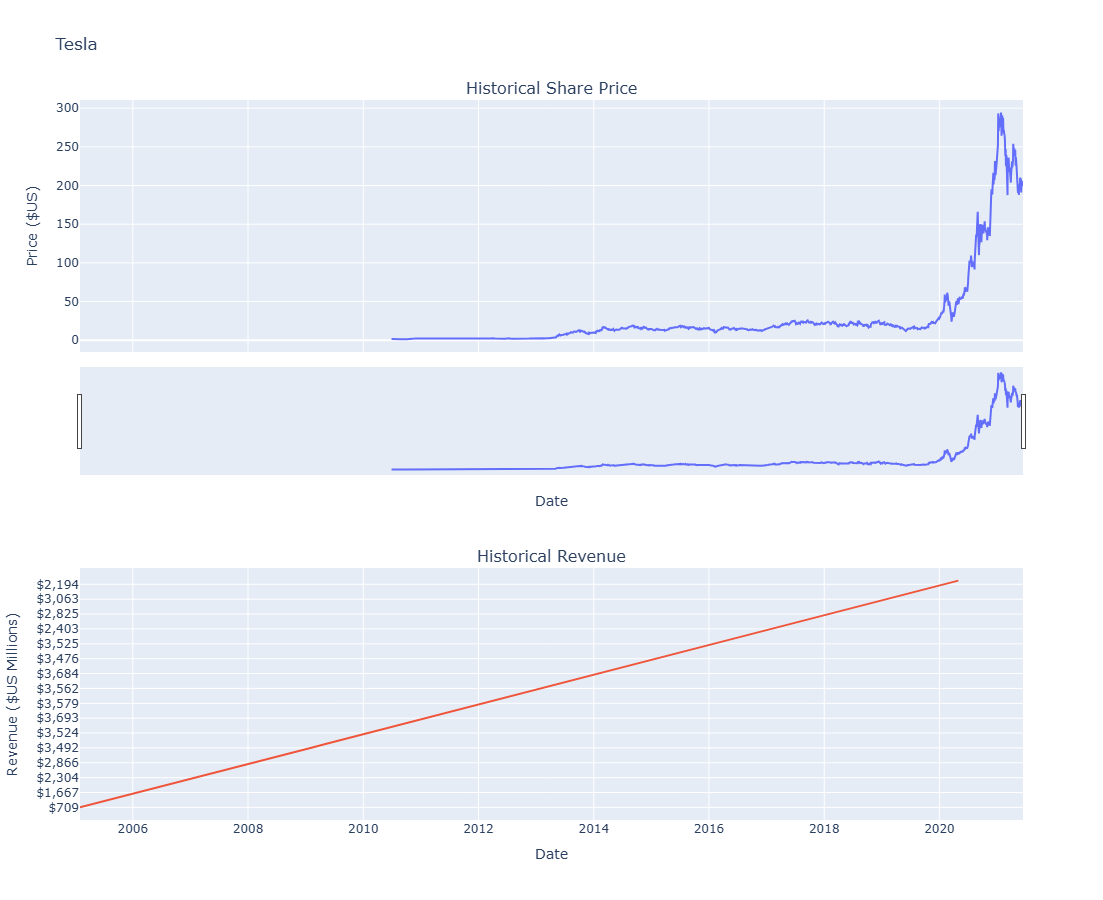

In [26]:
make_graph(tesla_data, tesla_revenue, "Tesla")

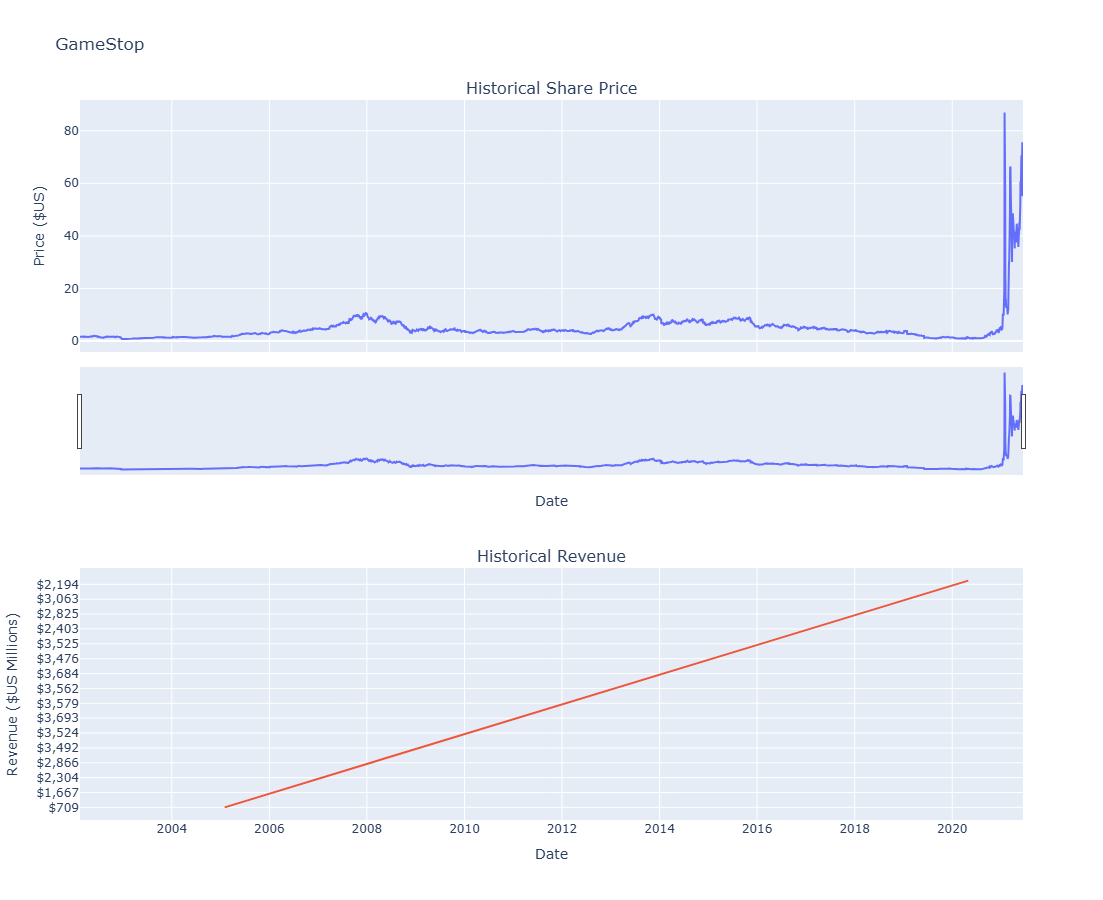

In [27]:
make_graph(gme_data, gme_revenue, "GameStop")